# Modeling Data:

##### Import Packages

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import scipy.stats as stats

sns.set(font_scale=1.5)
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import log_loss
from sklearn.model_selection import cross_val_score

##### Load the data 

In [9]:
# Load data after cleaning
Sub_Acc_Veh_Mod= pd.read_csv('C:/Users/Zilal/Desktop/GA/Capstone_data/Sub_Accident_Mod.csv')

In [10]:
# Check the data
Sub_Acc_Veh_Mod.shape

(10241, 49)

In [11]:
#Show the name's columns
Sub_Acc_Veh_Mod.columns

Index(['Unnamed: 0', 'Accident_Index', 'Longitude', 'Latitude', 'Police_Force',
       'Accident_Severity', 'Number_of_Vehicles', 'Number_of_Casualties',
       'Day_of_Week', 'Local_Authority_(District)',
       'Local_Authority_(Highway)', '1st_Road_Class', '1st_Road_Number',
       'Road_Type', 'Speed_limit', '2nd_Road_Number', 'Ped_Cross_Human',
       'Ped_Cross_Facilities', 'Light_Conditions', 'Weather',
       'Road_Conditions', 'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_Rural', 'Police_Officer_Attend', 'Age_Band_of_Driver',
       'Age_of_Vehicle', 'Driver_Home_Area_Type', 'Driver_IMD_Decile',
       'Engine_Capacity', 'Hit_Object_in_Carriageway',
       'Hit_Object_off_Carriageway', 'Journey_Purpose', 'Junction_Location',
       'make', 'model', 'Vehicle_Propulsion_Code', 'Sex_of_Driver',
       'Skidding_and_Overturning', 'Towing_and_Articulation',
       'Vehicle_Leaving_Carriageway', 'Vehicle_Location', 'Vehicle_Manoeuvre',
       'Vehicle_Reference'

In [12]:
#Sub_Acc_Veh_Mod.info()

In [13]:
#Sub_Acc_Veh_Mod.describe()

In [14]:
# remove unnamed column
Sub_Acc_Veh_Mod.drop('Unnamed: 0', axis=1, inplace=True)

##### We create sub data containing the most important columns (Mod_Final )

In [15]:
#sub data for modeling
Mod_Final = Sub_Acc_Veh_Mod[['Police_Officer_Attend','Vehicle_Type','Age_of_Vehicle','Engine_Capacity',
                             'Day_of_Week', 'Weather','Road_Conditions','Light_Conditions',
                             'Sex_of_Driver','Speed_limit','Urban_Rural']]

##### Dummify columns

In [16]:
Mod_Final = pd.get_dummies(Mod_Final, columns= Mod_Final.columns, drop_first=True)
Mod_Final.head(2)

,Police_Officer_Attend_2,Police_Officer_Attend_3,Vehicle_Type_Car,Vehicle_Type_Goods 7.5 tonnes mgw and over,Vehicle_Type_Goods over 3.5t. and under 7.5t,Vehicle_Type_Minibus (8 - 16 passenger seats),Vehicle_Type_Motorcycle 125cc and under,Vehicle_Type_Motorcycle 50cc and under,Vehicle_Type_Motorcycle over 125cc and up to 500cc,Vehicle_Type_Motorcycle over 500cc,...,Light_Conditions_6,Light_Conditions_7,Sex_of_Driver_Male,Sex_of_Driver_Not known,Speed_limit_30,Speed_limit_40,Speed_limit_50,Speed_limit_60,Speed_limit_70,Urban_Rural_2
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1


In [17]:
# Check the DataFrame size
Mod_Final.shape

(10241, 550)

#### Prepare data to build models

In [18]:
# Define X and y predictors
y = Sub_Acc_Veh_Mod['Accident_Severity']
X = Mod_Final

In [19]:
# Check the y shape
y.shape

(10241,)

In [20]:
# Check the X length
len(X.columns)

550

##### Check baseline

In [21]:
 y.value_counts(normalize=True)

3    0.870716
2    0.120594
1    0.008691
Name: Accident_Severity, dtype: float64

In [22]:
y.value_counts()

3    8917
2    1235
1      89
Name: Accident_Severity, dtype: int64

In [23]:
Sub_Acc_Veh_Mod['Accident_Severity'].value_counts()

3    8917
2    1235
1      89
Name: Accident_Severity, dtype: int64

In [24]:
baseline = y.value_counts(normalize=True).max()
baseline

0.8707157504149985

#### Build models to predict /Accident_Severity/
(1	Fatal
2	Serious
3	Slight)

In [25]:
# Prepare datasets for modeling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [26]:
# Show the results of the split
print("Training set has {} ".format(X_train.shape[0]))
print("Testing set has {} ".format(X_test.shape[0]))

Training set has 8192 
Testing set has 2049 


In [27]:
# Standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X.columns)

#### Fit a Logistic Regression 

In [28]:
#Model Building LogisticRegression
Model_Log=LogisticRegression(max_iter=5000)

In [29]:
#Model Training
Model_Log.fit(X_train,y_train)

LogisticRegression(max_iter=5000)

In [30]:
# Check the intercept
Model_Log.intercept_

array([-4.24524705,  0.80899878,  3.43624828])

In [31]:
# Check the train score
score_train_log = round(Model_Log.score(X_train, y_train)* 100, 2)
print('Accuracy score of logistic train set: ',score_train_log)

Accuracy score of logistic train set:  87.82


In [32]:
# Check the test score
score_test_log =round( Model_Log.score(X_test, y_test)* 100, 2)
print('Accurauy score of logistic test set: ',score_test_log)

Accurauy score of logistic test set:  86.09


In [33]:
# Check the cross-validation score
cv_scores_log = cross_val_score(Model_Log, X_train, y_train, cv=5)
print('cross_val_score_log(cv): ', cv_scores_log)

cross_val_score_log(cv):  [0.86516168 0.86150092 0.85775336 0.86507937 0.86446886]


In [34]:
cv_scores_log_mean = round(cv_scores_log.mean()*100,2)
print('Mean cross_val_score_log(cv): ', cv_scores_log_mean)

Mean cross_val_score_log(cv):  86.28


In [35]:
#Model Prediction
y_pred_log = Model_Log.predict(X_test)
print(' y_predict_log the first 20 observation: ', y_pred_log[:20])
print('------------------------------------------')
print(' y_test the first 20 observation: ', y_test.values[:20])

 y_predict_log the first 20 observation:  [3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
------------------------------------------
 y_test the first 20 observation:  [3 3 2 3 3 3 2 3 3 3 3 3 2 3 3 3 2 3 1 2]


In [36]:
len(y_pred_log)

2049

In [37]:
len(X_test)

2049

# Classification Report (Logistic)

In [38]:
#print classification report (precision, recall scores)
print('\nClassification_Report_Logistic\n',classification_report(y_test,y_pred_log))


Classification_Report_Logistic
               precision    recall  f1-score   support

           1       1.00      0.04      0.08        23
           2       0.36      0.04      0.07       256
           3       0.87      0.99      0.93      1770

    accuracy                           0.86      2049
   macro avg       0.74      0.36      0.36      2049
weighted avg       0.81      0.86      0.81      2049



### Confusion Matrix (Logistic)

In [39]:
from sklearn.metrics import confusion_matrix

In [40]:
# Create a function to show confusion matrix
Confusion_Logistic = confusion_matrix(y_test, y_pred_log)
pd.DataFrame(Confusion_Logistic, columns=sorted(y_train.unique()),
             index=sorted(y_train.unique()))

,1,2,3
1,1,1,21
2,0,10,246
3,0,17,1753


In [41]:
y_train.value_counts()

3    7147
2     979
1      66
Name: Accident_Severity, dtype: int64

In [42]:
y_test.value_counts()

3    1770
2     256
1      23
Name: Accident_Severity, dtype: int64

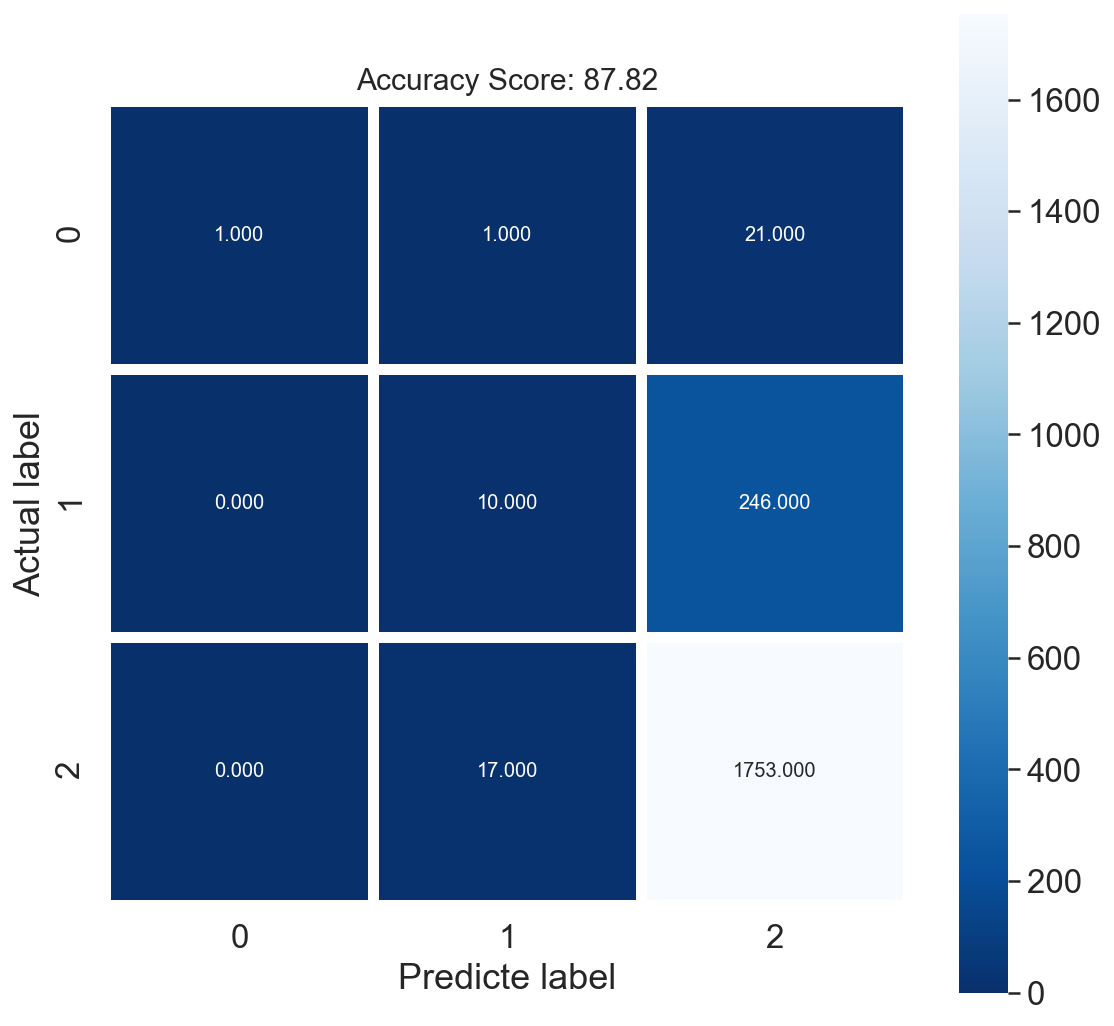

In [43]:
#Plot confusion matrix
plt.figure(figsize=(9,9))
sns.heatmap(Confusion_Logistic, annot=True, fmt=".3f", linewidths=5, square=True, cmap='Blues_r')
plt.ylabel('Actual label');
plt.xlabel('Predicte label');
all_sample_title = 'Accuracy Score: {0}'.format(score_train_log,".2f")
plt.title(all_sample_title, size = 15);

In [44]:
# Create a dataframe to look at the coefficients
coef_df = pd.DataFrame({'feature': X.columns,
                        'coef': Model_Log.coef_[0],
                        'abs_coef': np.abs(Model_Log.coef_[0])})

In [45]:
# Sort by absolute value of coefficient (magnitude)
coef_df = coef_df.sort_values(by='abs_coef', ascending=False)
coef_df

,feature,coef,abs_coef
6,Vehicle_Type_Motorcycle 125cc and under,0.424973,0.424973
0,Police_Officer_Attend_2,-0.373213,0.373213
532,Weather_8,-0.362663,0.362663
549,Urban_Rural_2,0.357553,0.357553
291,Engine_Capacity_1896.0,0.355660,0.355660
...,...,...,...
408,Engine_Capacity_2696.0,0.000000,0.000000
75,Engine_Capacity_625.0,0.000000,0.000000
461,Engine_Capacity_3227.0,0.000000,0.000000
105,Engine_Capacity_849.0,0.000000,0.000000


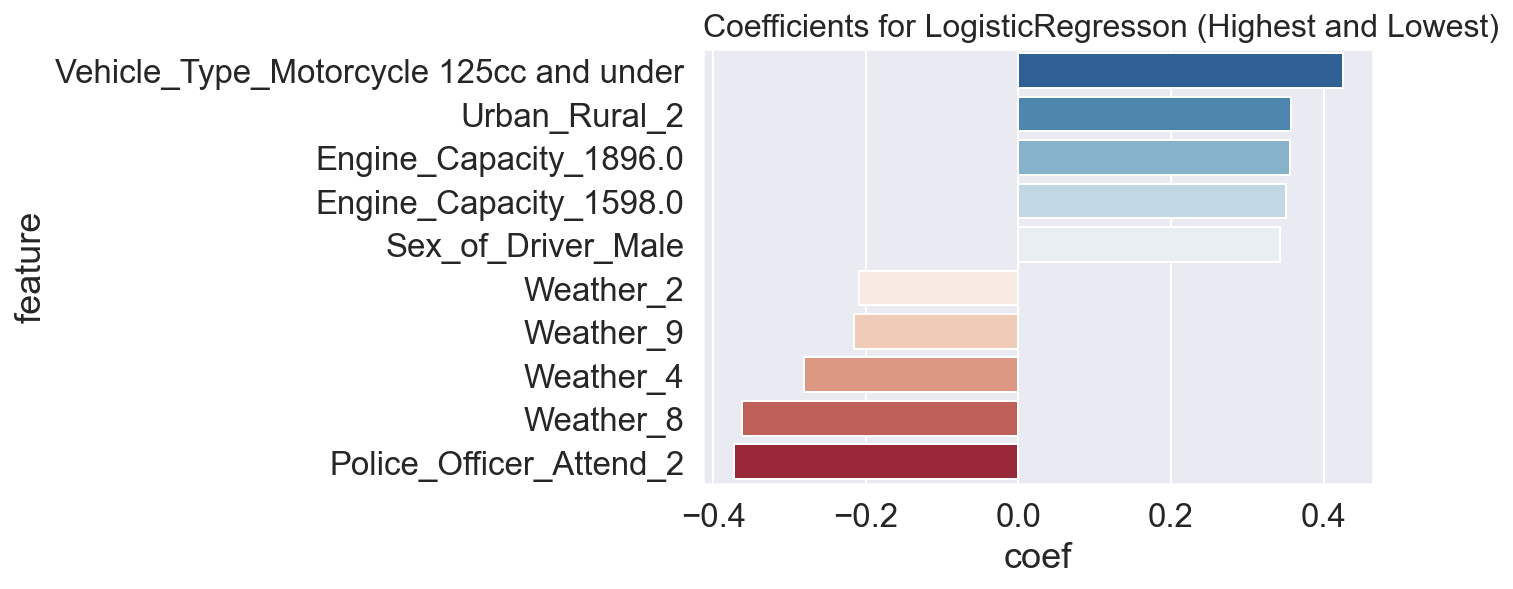

In [46]:
# Plot the coefficient table
sort_coef = pd.concat([coef_df.sort_values(by='coef', ascending=False).head(5),
                      coef_df.sort_values(by='coef', ascending=False).tail(5)])
sns.barplot(y = sort_coef.feature, x = sort_coef.coef, palette = "RdBu_r")
plt.title("Coefficients for LogisticRegresson (Highest and Lowest)", loc = 'left', fontsize = 16)
plt.show()

### Random Forest Classifier:

In [47]:
# # instantiate RandomForestClassifier with entropy and class_weight
# forest_1 = RandomForestClassifier(random_state=4, criterion='entropy', n_jobs=-1, class_weight='balanced')

# # train
# forest_1.fit(X_train, y_train)

# # predict
# y_test_preds  = forest_1.predict(X_test)

# # evaluate
# report = classification_report(y_test, y_test_preds)
# print('Classification Report Random Forest - with Entropy and class_weight Parameter: \n', report)

In [48]:
#Random Forest Classifier fit
random_forest = RandomForestClassifier(random_state=4, criterion='entropy', n_jobs=-1, class_weight='balanced',n_estimators=200)
#(n_estimators=200,class_weight='balanced')
random_forest.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       n_estimators=200, n_jobs=-1, random_state=4)

In [49]:
# Check the train score
score_train_forest = round(random_forest.score(X_train, y_train)* 100, 2)
print('Accuracy score of forest train set: ',score_train_forest)

Accuracy score of forest train set:  99.49


In [50]:
# Check the test score
score_test_forest = round(random_forest.score(X_test, y_test)* 100, 2)
print('Accurauy score of forest test set: ',score_test_forest)

Accurauy score of forest test set:  85.94


In [51]:
# Check the cross-validation score
cv_scores_forest = cross_val_score(random_forest, X_train, y_train, cv=5)
print('cross_val_score(cv): ', cv_scores_forest)

cross_val_score(cv):  [0.86516168 0.86638194 0.86630037 0.86752137 0.86691087]


In [52]:
#cross-validation score /mean/
cv_scores_forest_mean = round(cv_scores_forest.mean()* 100, 2)
print('Mean cross_val_score_forest(cv): ', cv_scores_forest_mean)

Mean cross_val_score_forest(cv):  86.65


In [53]:
#Model Prediction
y_pred_forest = random_forest.predict(X_test)
print(' y_predict_forest the first 20 observation: ', y_pred_forest[:20])
print('------------------------------------------')
print(' y_test the first 20 observation: ', y_test.values[:20])

 y_predict_forest the first 20 observation:  [3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
------------------------------------------
 y_test the first 20 observation:  [3 3 2 3 3 3 2 3 3 3 3 3 2 3 3 3 2 3 1 2]


In [54]:
baseline = y.value_counts(normalize=True).max()
baseline

0.8707157504149985

In [55]:
baseline

0.8707157504149985

In [56]:
#classification_report_forest
#print classification report (precision, recall scores)
print('\nClassification_Report_Forest\n',classification_report(y_test,y_pred_forest))


Classification_Report_Forest
               precision    recall  f1-score   support

           1       0.00      0.00      0.00        23
           2       0.30      0.03      0.05       256
           3       0.87      0.99      0.92      1770

    accuracy                           0.86      2049
   macro avg       0.39      0.34      0.32      2049
weighted avg       0.79      0.86      0.80      2049



C:\Users\Zilal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Zilal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Zilal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [57]:
# Create a function to show confusion matrix
Confusion_Forest = confusion_matrix(y_test,y_pred_forest)
pd.DataFrame(Confusion_Forest, columns=sorted(y_train.unique()),
             index=sorted(y_train.unique()))

,1,2,3
1,0,0,23
2,0,7,249
3,0,16,1754


#### Evaluating Random Forest Classifier with SMOTE

In [58]:
from imblearn.over_sampling import SMOTE

In [59]:
# view previous class distribution
print('Before Upsampling with SMOTE:')
print(Sub_Acc_Veh_Mod['Accident_Severity'].value_counts())

# resample data ONLY using training data
X_resampled, y_resampled = SMOTE().fit_resample(X_train, y_train) 

# view sample class distribution after SMOTE
print('\nAfter Upsampling with SMOTE:'), print(pd.Series(y_resampled).value_counts())

Before Upsampling with SMOTE:
3    8917
2    1235
1      89
Name: Accident_Severity, dtype: int64

After Upsampling with SMOTE:
1    7147
2    7147
3    7147
Name: Accident_Severity, dtype: int64


(None, None)

In [60]:
# perform ususal train-test-split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, random_state=0)

In [61]:
# instantiate second RandomForestClassifier with SMOTE
Forest_Smote = RandomForestClassifier(random_state=4, criterion='entropy', n_jobs=-1)

# train
Forest_Smote.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_jobs=-1, random_state=4)

In [62]:
# Check the train score
score_train_Smote = round(Forest_Smote.score(X_train, y_train)* 100, 2)
print('Accuracy score of Random Forest -SMOTE train set: ',score_train_log)

Accuracy score of Random Forest -SMOTE train set:  87.82


In [63]:
# Check the test score
score_test_Smote = round(Forest_Smote.score(X_test, y_test)* 100, 2)
print('Accurauy score of  Random Forest -SMOTE test set: ',score_test_forest)

Accurauy score of  Random Forest -SMOTE test set:  85.94


In [64]:
#Model Prediction
y_pred_Smote = Forest_Smote.predict(X_test)
print(' y_predict_Smote the first 20 observation: ', y_pred_Smote[:20])
print('------------------------------------------')
print(' y_test the first 20 observation: ', y_test.values[:20])

 y_predict_Smote the first 20 observation:  [3 1 3 2 2 3 1 2 1 3 1 3 3 2 2 1 3 1 3 1]
------------------------------------------
 y_test the first 20 observation:  [3 1 2 2 2 3 1 2 1 3 1 3 3 2 2 1 3 1 3 1]


In [66]:
# evaluate
report = classification_report(y_test, y_pred_Smote)
print('Classification Report Random Forest -SMOTE Upsampling: \n', report) 

Classification Report Random Forest -SMOTE Upsampling: 
               precision    recall  f1-score   support

           1       1.00      0.99      1.00      1765
           2       0.99      0.88      0.93      1790
           3       0.89      0.99      0.94      1806

    accuracy                           0.95      5361
   macro avg       0.96      0.95      0.95      5361
weighted avg       0.96      0.95      0.95      5361



In [68]:
# Create a function to show confusion matrix
Confusion_Forest = confusion_matrix(y_test, y_pred_Smote)
pd.DataFrame(Confusion_Forest, columns=sorted(y_train.unique()),
             index=sorted(y_train.unique()))

,1,2,3
1,1753,2,10
2,0,1576,214
3,0,18,1788


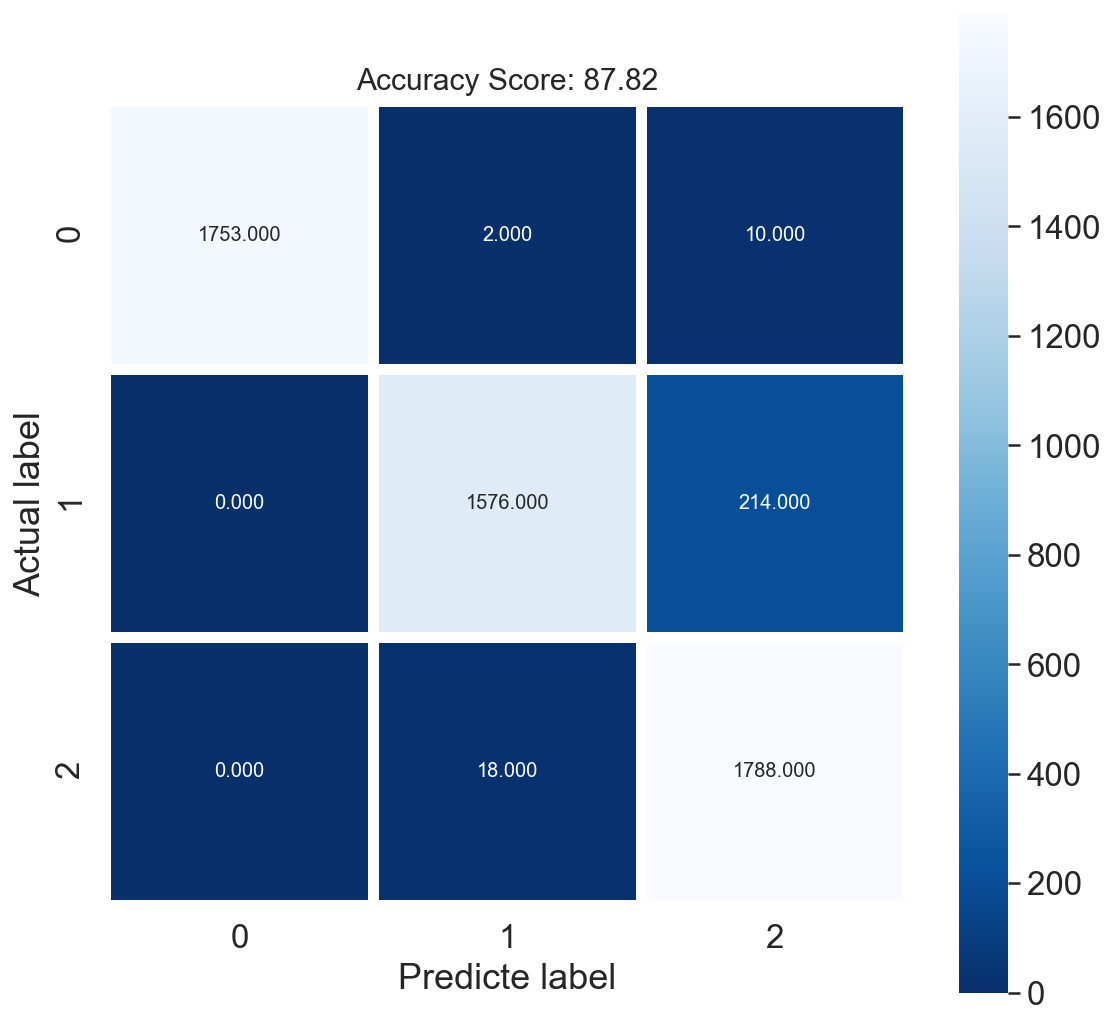

In [69]:
#Plot confusion matrix
plt.figure(figsize=(9,9))
sns.heatmap(Confusion_Forest, annot=True, fmt=".3f", linewidths=5, square=True, cmap='Blues_r')
plt.ylabel('Actual label');
plt.xlabel('Predicte label');
all_sample_title = 'Accuracy Score: {0}'.format(score_train_log,".2f")
plt.title(all_sample_title, size = 15);

### Decision Tree Classifier

In [70]:
from sklearn.tree import DecisionTreeClassifier

In [71]:
#Decision Tree Classifier fit
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [72]:
# Check the train score
score_train_decision = round(decision_tree.score(X_train, y_train)* 100, 2)
print('Accuracy score of decision train set: ',score_train_decision)

Accuracy score of decision train set:  99.87


In [73]:
# Check the test score
score_test_decision = round(decision_tree.score(X_test, y_test)* 100, 2)
print('Accurauy score of decision test set: ',score_test_decision)

Accurauy score of decision test set:  91.61


In [74]:
# Check the cross-validation score
cv_scores_decision = cross_val_score(decision_tree, X_train, y_train, cv=5)
print('cross_val_score_decision(cv): ', cv_scores_decision)

cross_val_score_decision(cv):  [0.91604478 0.897699   0.90858209 0.91044776 0.90298507]


In [75]:
# Check the cross-validation score/mean/
cv_scores_decision_mean = round(cv_scores_decision.mean()* 100, 2)
print('Mean cross_val_score_decision(cv): ', cv_scores_decision_mean)

Mean cross_val_score_decision(cv):  90.72


In [76]:
#Model Prediction
y_pred_decision = decision_tree.predict(X_test)
print(' y_predict_decision the first 20 observation: ', y_pred_decision[:20])
print('------------------------------------------')
print(' y_test the first 20 observation: ', y_test.values[:20])

 y_predict_decision the first 20 observation:  [3 1 3 2 2 3 1 2 1 2 1 3 3 2 2 1 3 1 3 1]
------------------------------------------
 y_test the first 20 observation:  [3 1 2 2 2 3 1 2 1 3 1 3 3 2 2 1 3 1 3 1]


In [77]:
#classification_report_decision
decision_report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=y_pred_decision)
print("Accuracy", score_test_decision)
print('-----------------')
print('decision_report')
print('------------------')
print(decision_report)

Accuracy 91.61
-----------------
decision_report
------------------
              precision    recall  f1-score   support

           1   0.984154  0.985269  0.984711      1765
           2   0.880246  0.878771  0.879508      1790
           3   0.884892  0.885382  0.885137      1806

    accuracy                       0.916060      5361
   macro avg   0.916431  0.916474  0.916452      5361
weighted avg   0.916021  0.916060  0.916040      5361



In [78]:
### Confusion Matrix 
pd.crosstab(y_test, y_pred_decision, rownames=['Actual'], colnames=['Predicted'], margins=True)

Predicted,1,2,3,All
Actual,,,,
1,1739,20,6,1765
2,15,1573,202,1790
3,13,194,1599,1806
All,1767,1787,1807,5361


In [79]:
# Create a function to show confusion matrix
Confusion_Tree = confusion_matrix(y_test, y_pred_decision)
pd.DataFrame(Confusion_Tree, columns=sorted(y_train.unique()),
             index=sorted(y_train.unique()))

,1,2,3
1,1739,20,6
2,15,1573,202
3,13,194,1599


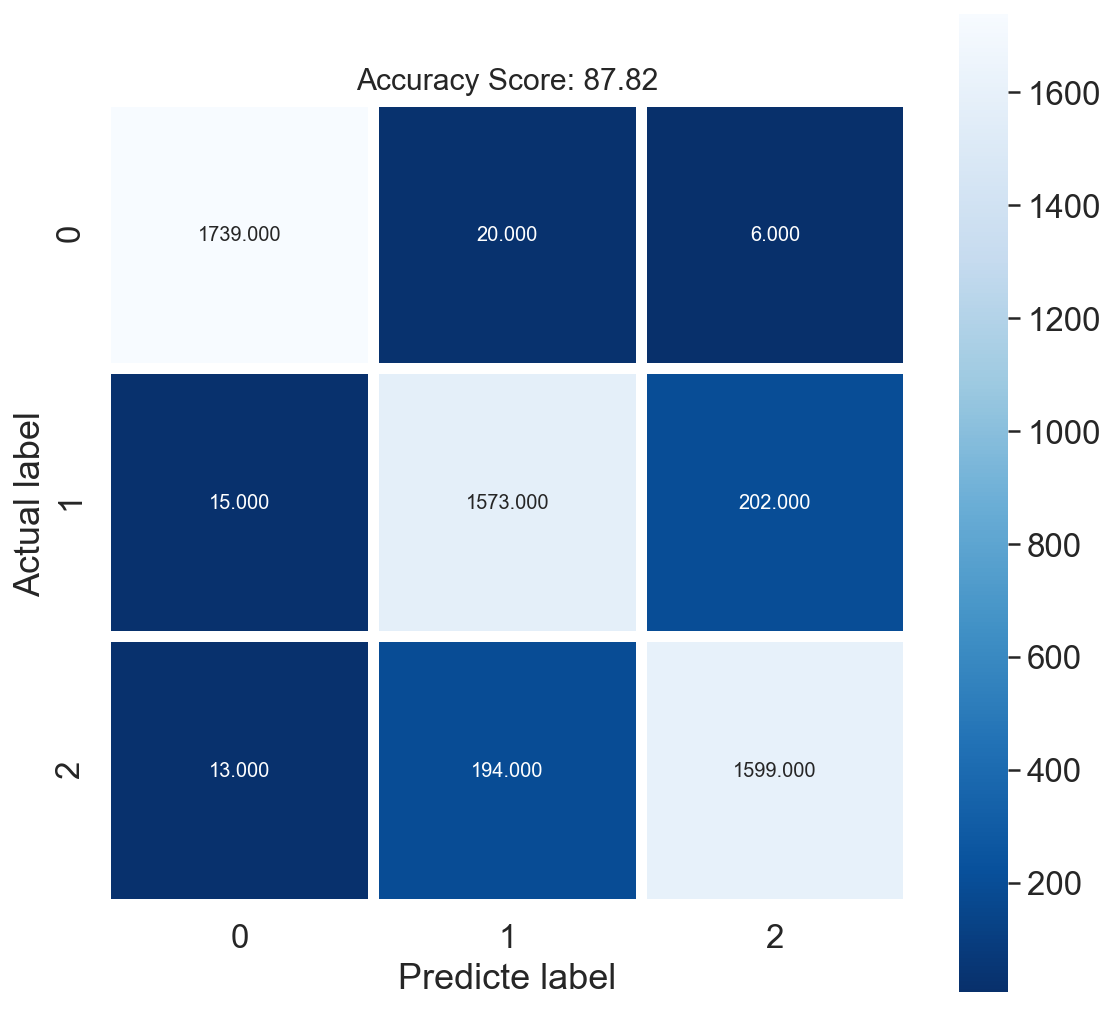

In [80]:
#Plot confusion matrix
plt.figure(figsize=(9,9))
sns.heatmap(Confusion_Tree, annot=True, fmt=".3f", linewidths=5, square=True, cmap='Blues_r')
plt.ylabel('Actual label');
plt.xlabel('Predicte label');
all_sample_title = 'Accuracy Score: {0}'.format(score_train_log,".2f")
plt.title(all_sample_title, size = 15);

In [81]:
# Extract feature importances/decision_tree/
dtree_feat = pd.DataFrame(decision_tree.feature_importances_, index=X_train.columns,
                       columns=['feature_importances'])

dtree_feat.sort_values('feature_importances', ascending=False).head(20)

,feature_importances
Engine_Capacity_1598.0,0.100639
Sex_of_Driver_Male,0.092667
Engine_Capacity_1896.0,0.062452
Light_Conditions_4,0.050923
Engine_Capacity_1998.0,0.039575
Speed_limit_60,0.038663
Road_Conditions_2,0.029831
Speed_limit_30,0.027127
Speed_limit_70,0.025716
Urban_Rural_2,0.024538


<AxesSubplot:>

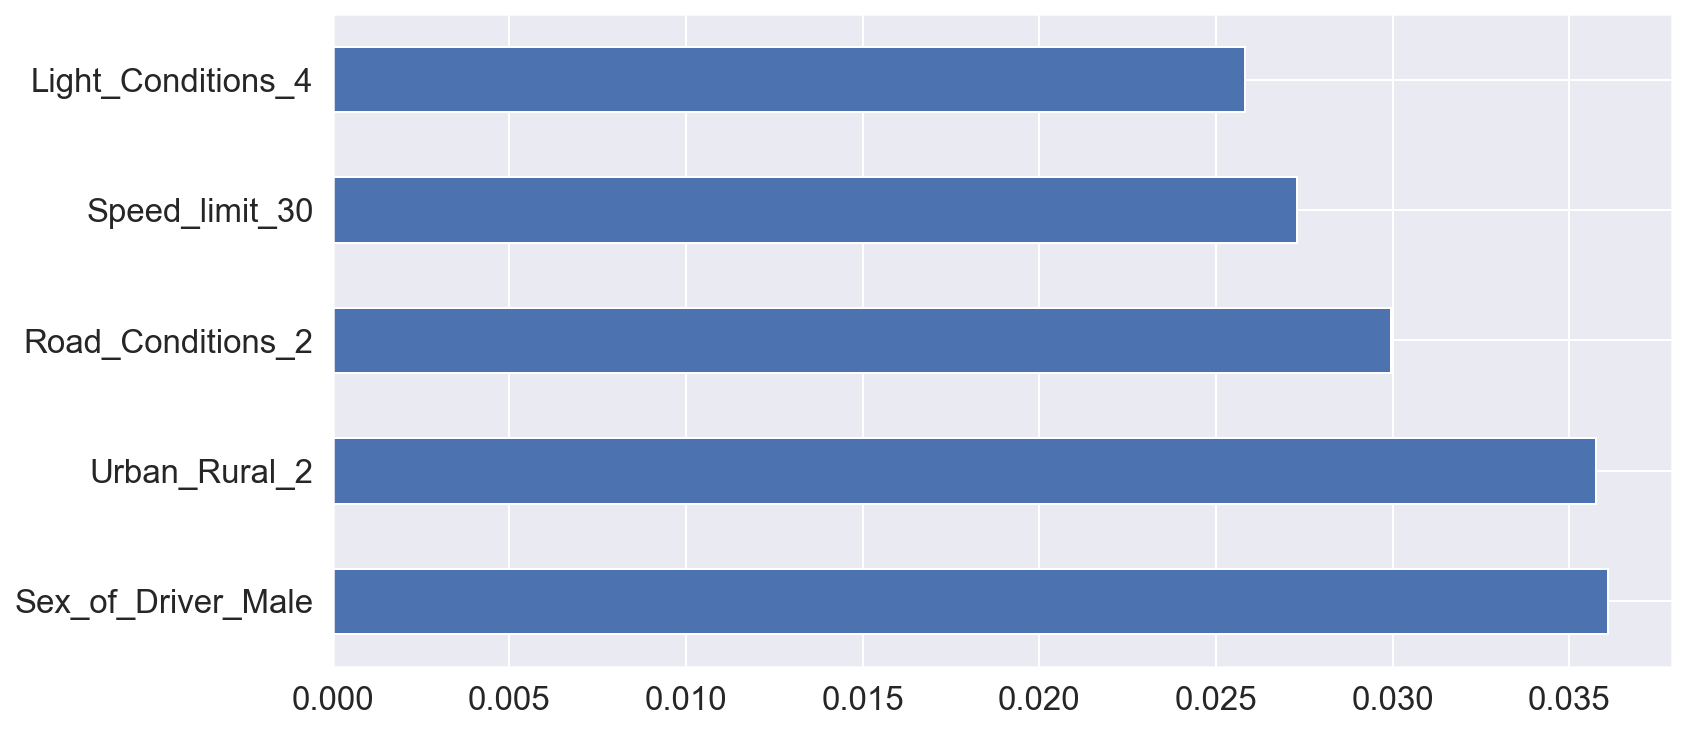

In [83]:
#plot feature importances (random forest)
plt.figure(figsize=(12,6))
feat_importances = pd.Series(random_forest.feature_importances_, index=X_train.columns)
feat_importances.nlargest(5).plot(kind='barh')

<AxesSubplot:>

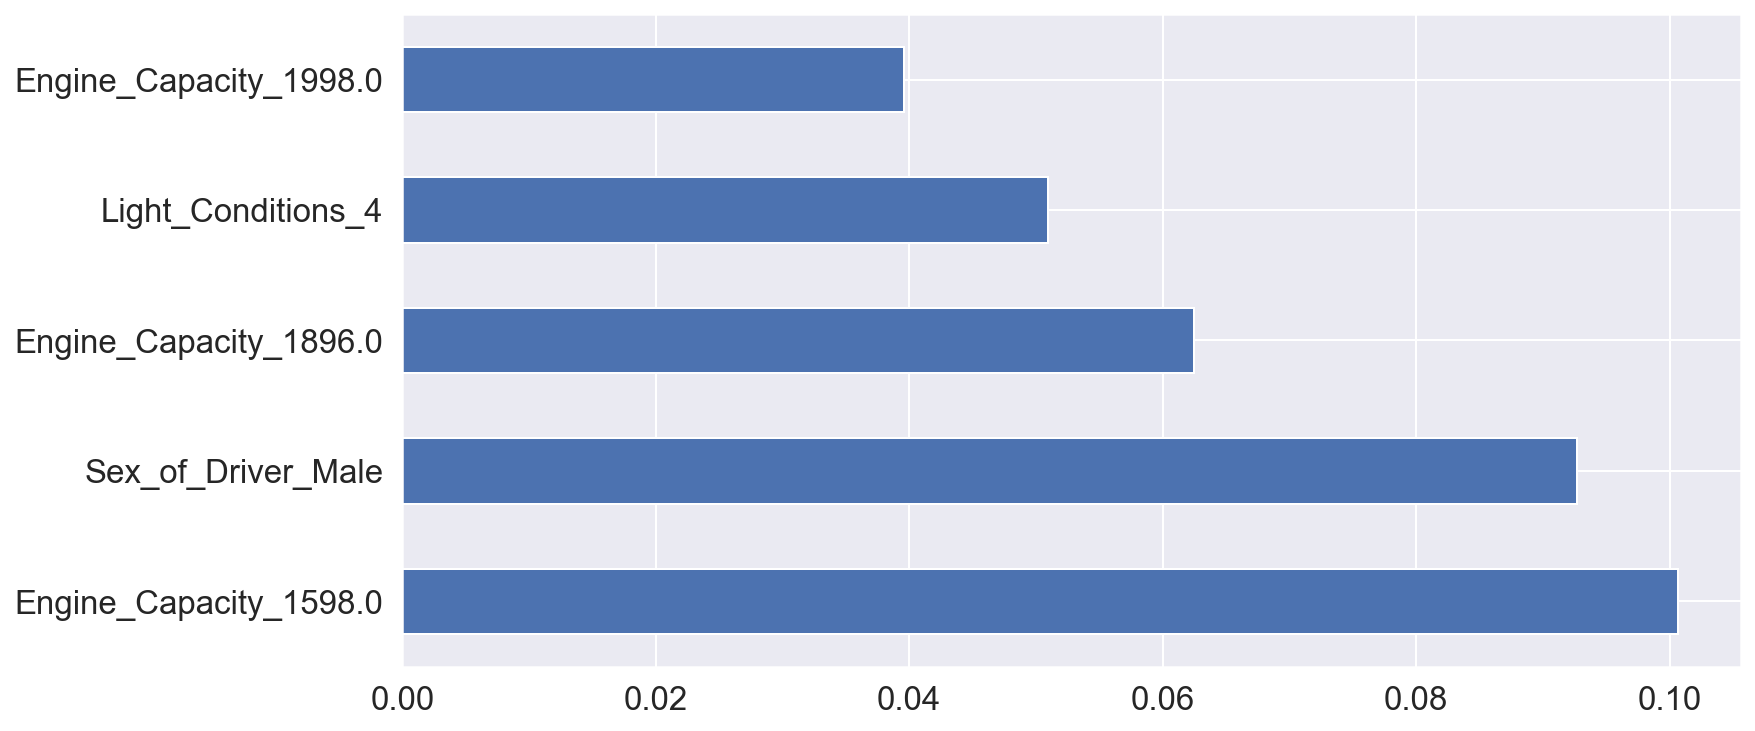

In [85]:
#plot feature importances (decision tree)
plt.figure(figsize=(12,6))
feat_importances = pd.Series(decision_tree.feature_importances_, index=X_train.columns)
feat_importances.nlargest(5).plot(kind='barh')

<AxesSubplot:>

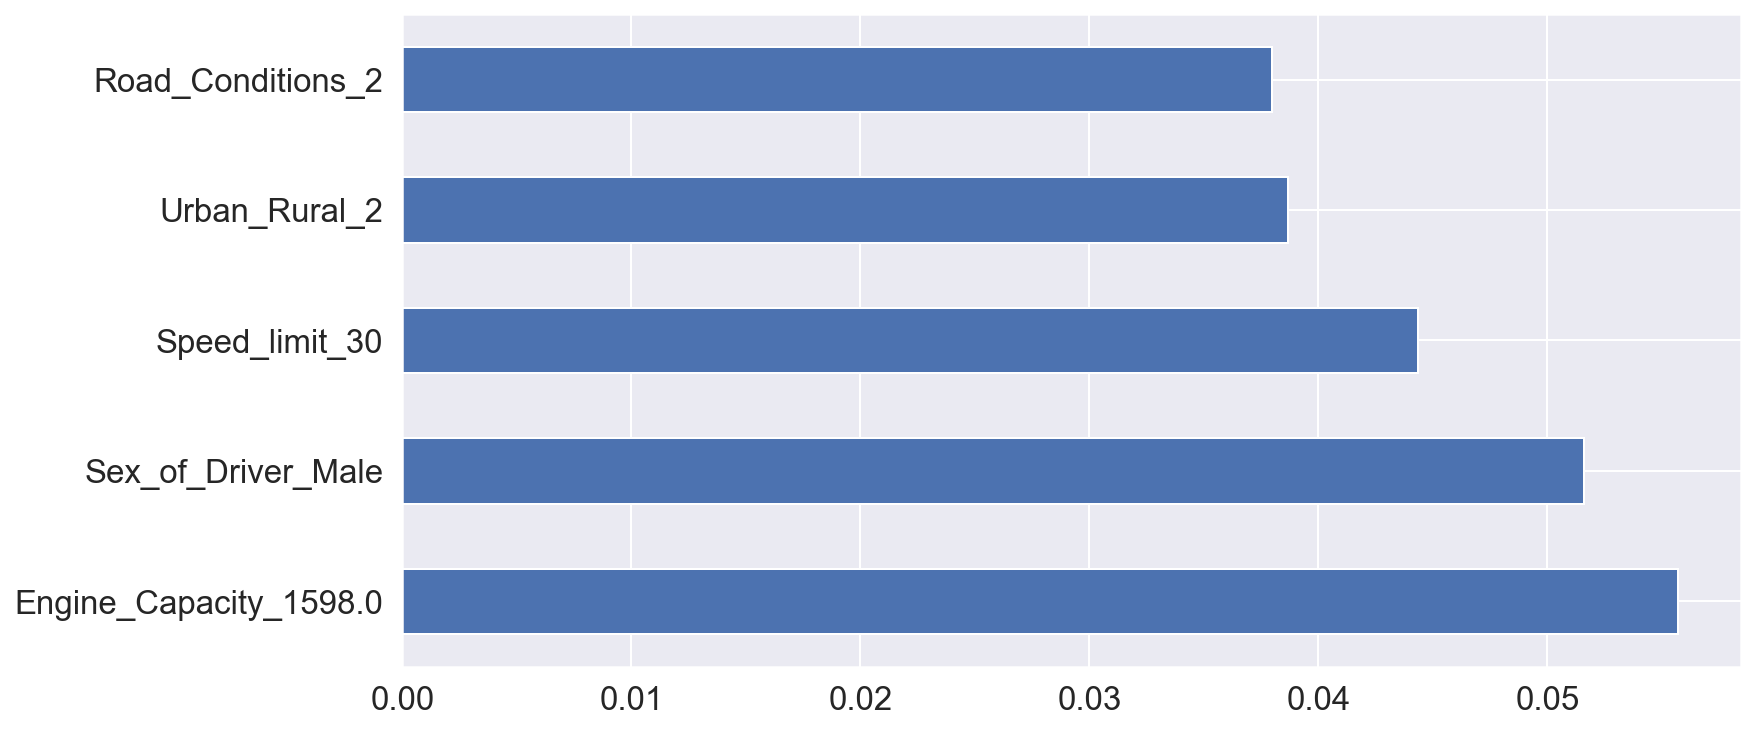

In [86]:
#Forest_Smote
#plot feature importances smote (random forest)
plt.figure(figsize=(12,6))
feat_importances = pd.Series(Forest_Smote.feature_importances_, index=X_train.columns)
feat_importances.nlargest(5).plot(kind='barh')

### Summary

We experimented with multiple classification algorithms
(Logistic Regression, DecisionTreeClassifier, RandomForestClassifier).
All models achaived good score.
As we can see that Logistic regression did pretty well in terms of number. If we look carefully at the confusion matrix. We can definitely tell that Decision tree algorithm did much better. It predicted more fatal and serious injuries as true positive. The accuracy score is lower compare to another algorithm because other algorithm predicted majority of slightly accidents and those numbers are really high overall in the dataset. Confusion matrix helps us to understand what algorithm actually worked better in terms of looking at all different prediction of each class.